In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import linalg, optimize
import math
import stat

## Returns

### Simulate a geometric random walk

In [10]:
n = 252; mu = 0.05; sigma = 0.2; s0 = 120

In [11]:
np.random.seed(123)

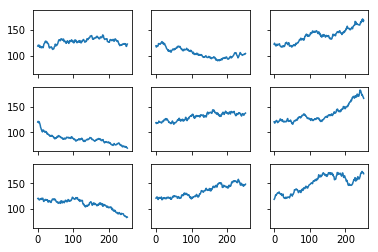

In [12]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        logr = np.random.normal(mu/n, sigma/np.sqrt(n), n)
        s = s0*np.exp(np.cumsum(logr))
        axs[i, j].plot(s)      

### Simulate a strategy

Suppose a hedge fund owns $\$1,000,000$ of stock. They used $\$50,000$ of their own capital and $\$950,000$ of borrowed money for the purchase. If the value of stock falls below $\$950,000$, the fund will sell the stock and repay the loan. The log returns of the stock has a mean of $0.05$ per year, and a standard deviation of $0.2$ per year. Suppose tt has $252$ trading days per year.

What is the probability the fund will wipe out its investment of $\$50,000$ in the next $100$ days? In other words, the value of the stock falls below $\$950,000$ at the close of at least one day. 
    
What is the expected return? Express the return as daily return. For example, the fund holds the position for $\tau$ days before selling, the daily return is $-\frac{1}{\tau}$.  




In [20]:
niter = 10000
below = [0] * niter
returns = [0] * niter
expiry = 100
mean = 0.15
sd = 0.2
N = 252
S0 = 1e6
asset = 5e4
debt = S0 - asset

In [28]:
np.random.seed(123)

logS0 = math.log(S0)
logDebt = math.log(debt)
for i in range(niter):
    r = np.random.normal(mean/N -0.5*sd*sd/N, sd/np.sqrt(N), expiry)
    logPrice = logS0 + np.cumsum(r)
    minimum = min(logPrice)
    below[i] = minimum < logDebt
    
np.mean(below)

0.5165

-0.02221068208823992

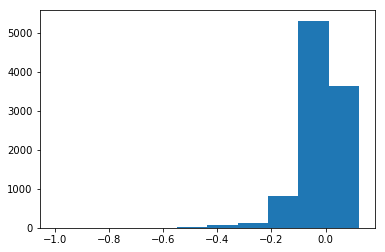

In [27]:
np.random.seed(456)

logS0 = math.log(S0)
logDebt = math.log(debt)
for i in range(niter):
    r = np.random.normal(mean/N - 0.5*sd*sd/N, sd/np.sqrt(N), expiry)
    logPrice = logS0 + np.cumsum(r)
    
    #plt.plot(logPrice)
    
    minimum = min(logPrice)
    
    if minimum < logDebt:
        l = [i for i, e in enumerate(logPrice) if e < logDebt]
        tau = l[0]+1
        returns[i] =  - 1/tau
    else:    
        returns[i] = (math.exp(logPrice[-1]) - S0)/asset*(1/expiry)
    
plt.hist(returns)
np.mean(returns)

In [63]:
t = 100 / 252
(np.exp(0.15 * t) - 1) / t

0.15455419677217236